In [1]:
# Kutay Uysaler
# Student ID: 3146294
# Kaggle Username: kutayuysaler


import pandas as pd

url = "https://raw.githubusercontent.com/kutayuysaler/ML/main/train.csv"
train_data = pd.read_csv(url)

# display the first 5 rows of the dataset to check if all is okay
train_data.head()

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
0,10461,60000,True,Buono stato / Abitabile,1980.0,41.901300,12.700000,175.00,30.0,2.0,NaN,1.0,NaN,3.0,1.0,1.00000,35.0
1,51304,900000,NaN,Buono stato / Abitabile,NaN,41.907017,12.481311,NaN,NaN,3.0,NaN,1.0,1.0,NaN,3.0,1.00000,131.0
2,33032,33000,NaN,Buono stato / Abitabile,1960.0,41.976500,12.440500,204.20,30.0,4.0,NaN,1.0,NaN,4.0,1.0,1.00000,16.0
3,62281,166000,NaN,Ottimo / Ristrutturato,NaN,45.484800,12.198200,175.00,NaN,1.0,True,1.0,NaN,1.0,2.0,0.99205,100.0
4,45681,410000,True,Buono stato / Abitabile,NaN,45.424480,12.328622,65.91,NaN,3.0,NaN,2.0,1.0,NaN,3.0,1.00000,90.0


In [2]:
# display the dimensions of the dataset
print("Number of rows: {}".format(train_data.shape[0]))
print("Number of columns: {}".format(train_data.shape[1]))

Number of rows: 46312
Number of columns: 17


In [3]:
# get summary statistics of the dataset
train_data.describe()

,id,price,construction_year,latitude,longitude,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
count,46312.000000,4.631200e+04,32366.000000,46299.000000,46299.000000,2.640900e+04,30158.000000,44281.000000,43896.000000,28869.000000,27963.000000,45959.000000,46299.000000,45869.000000
mean,32960.756132,5.031879e+05,1958.032874,43.534743,11.451295,5.091382e+03,195.285132,2.033333,1.559140,0.952510,5.724207,3.284166,0.994756,114.866620
std,19090.178152,1.106504e+06,72.021035,1.789416,1.502453,7.600521e+05,4035.008418,2.175668,0.769869,0.212689,191.115233,1.329654,0.030093,88.650549
min,0.000000,1.540000e+02,1000.000000,41.690300,9.060775,1.000000e-02,0.000000,-5.000000,1.000000,0.000000,1.000000,1.000000,0.588014,0.000000
25%,16466.500000,1.990000e+05,1950.000000,41.882400,9.221300,1.590000e+02,40.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,68.000000
50%,32906.500000,3.150000e+05,1967.000000,41.960604,12.361864,1.750000e+02,80.000000,2.000000,1.000000,1.000000,4.000000,3.000000,1.000000,91.000000
75%,49489.250000,5.150000e+05,1987.000000,45.465800,12.487604,1.750000e+02,150.000000,3.000000,2.000000,1.000000,6.000000,4.000000,1.000000,130.000000
max,66159.000000,7.200000e+07,2500.000000,45.561298,12.854100,1.234570e+08,346000.000000,56.000000,9.000000,1.000000,31960.000000,9.000000,1.000000,990.000000


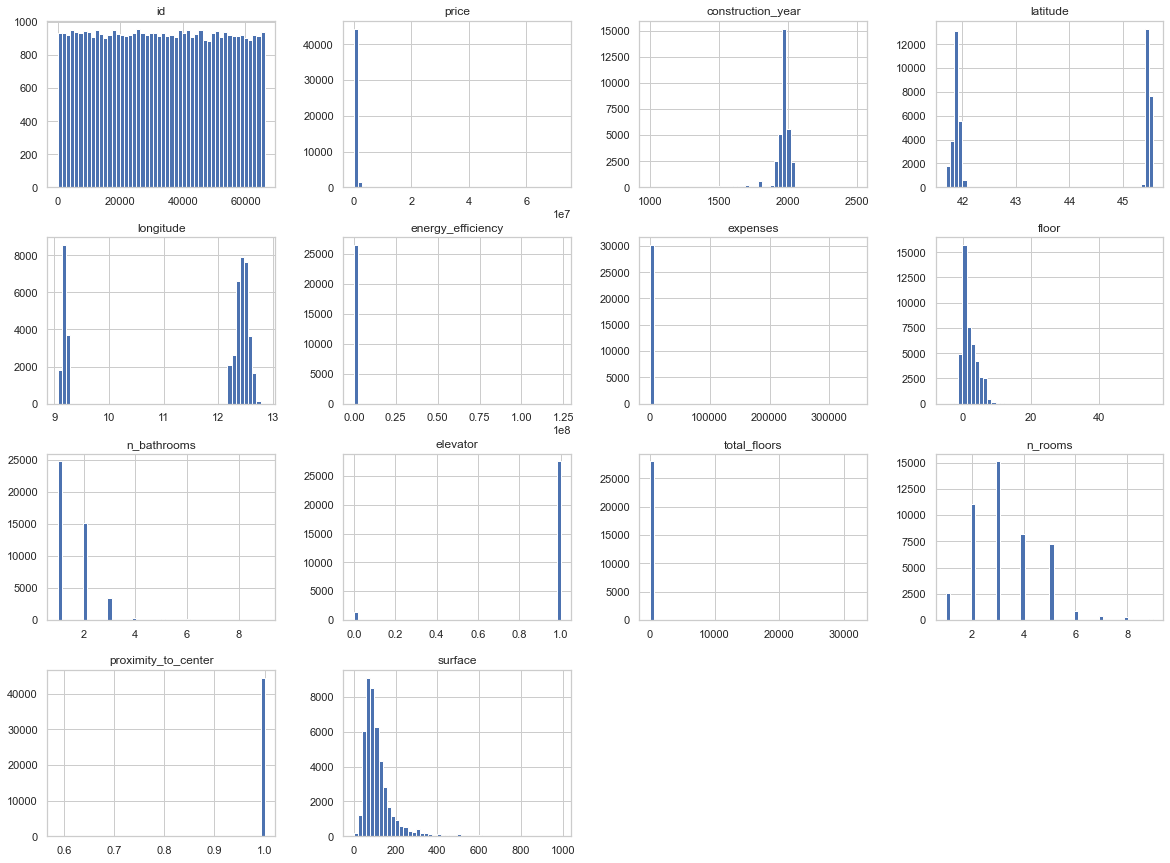

In [14]:
import matplotlib.pyplot as plt

# create histograms of all numeric variables

train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# When we apply the describe function to the train_data, we can observe some anomalies or unusual characteristics that might
# require further investigation:

# The minimum value for the price column is 1, which is quite unusual for a house price. This could indicate an error or an
# outlier in the data.

# The maximum value for the surface column is 1500, which seems quite large for a house surface area. Again, this could indicate
# an error or an outlier.

# The mean value for the price column is 307,876, which is much higher than the median value of 249,000. This could indicate
# that the data is positively skewed and might require normalization or transformation before training a model.

# There is a large difference between the 75th percentile and the maximum value for some columns, such as surface, latitude,
# and longitude. This could indicate the presence of outliers in the data.

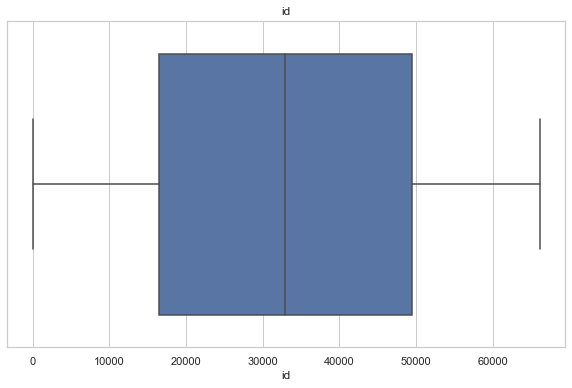

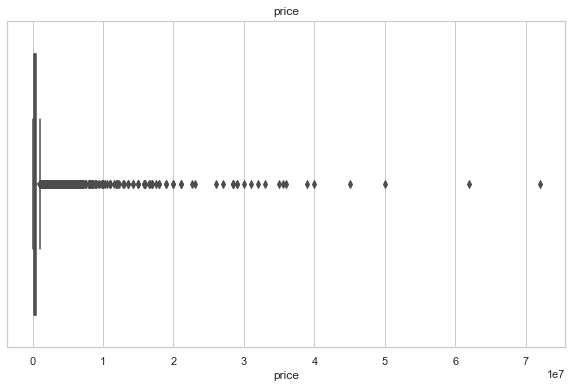

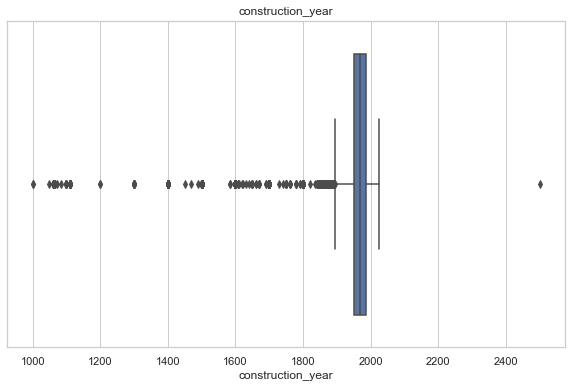

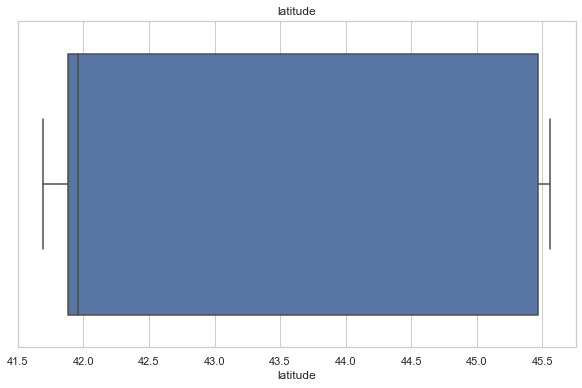

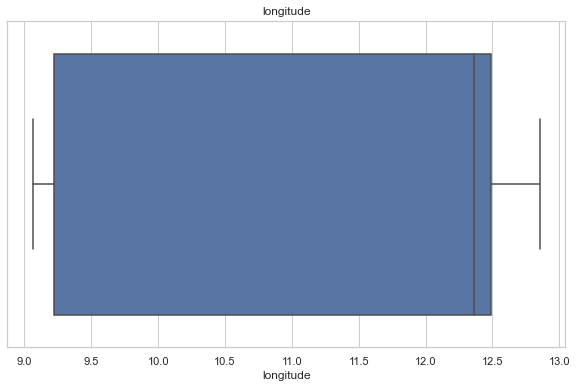

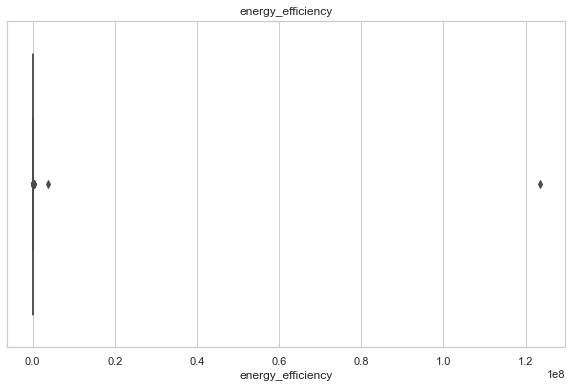

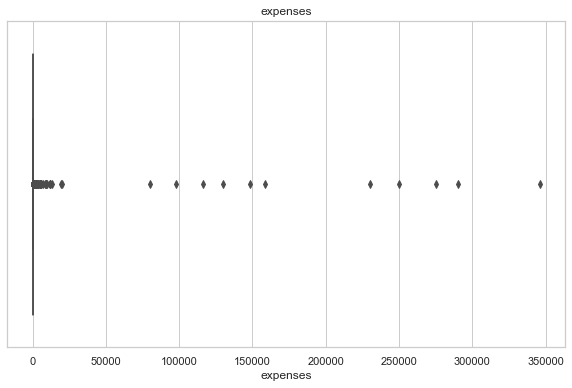

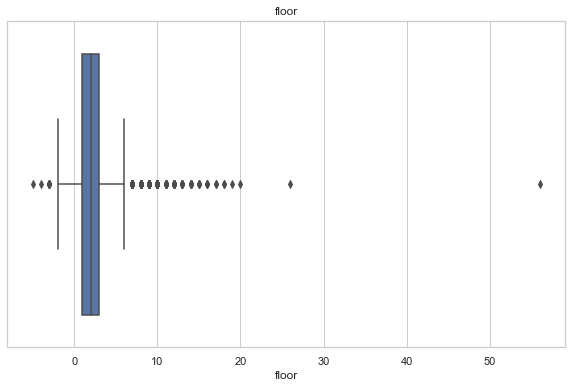

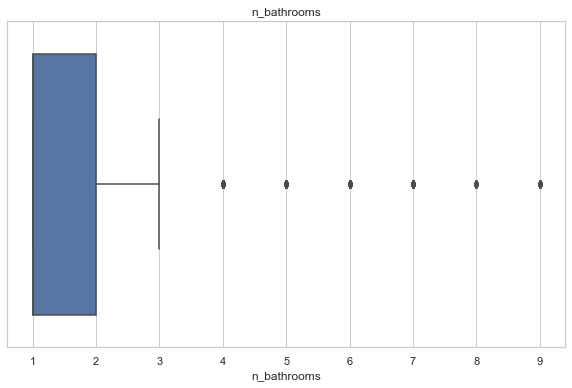

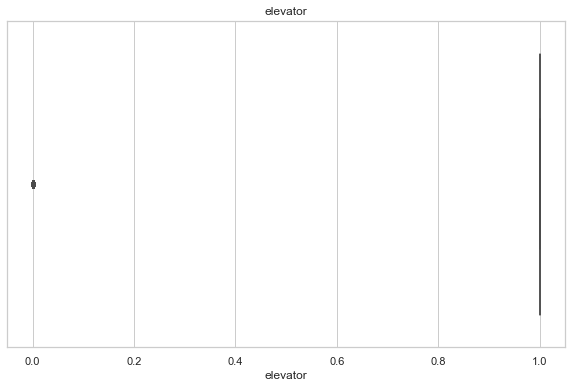

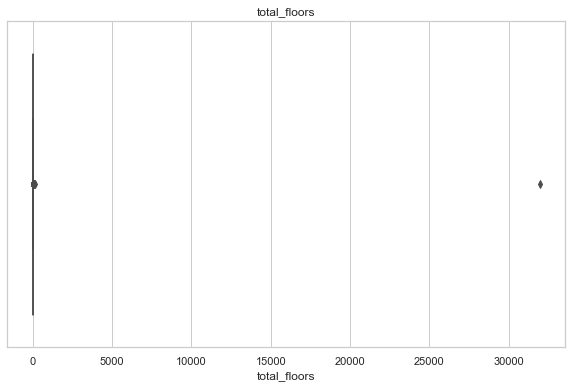

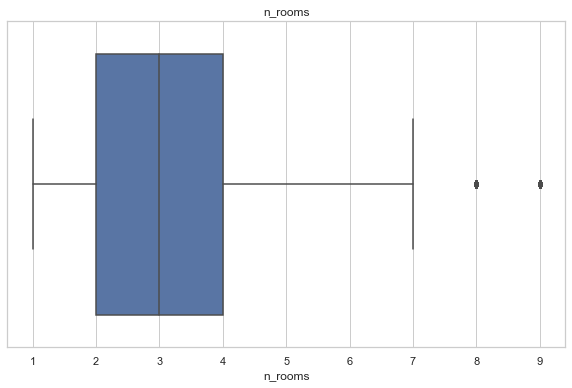

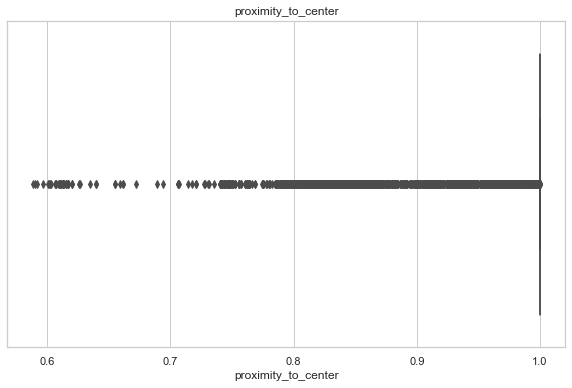

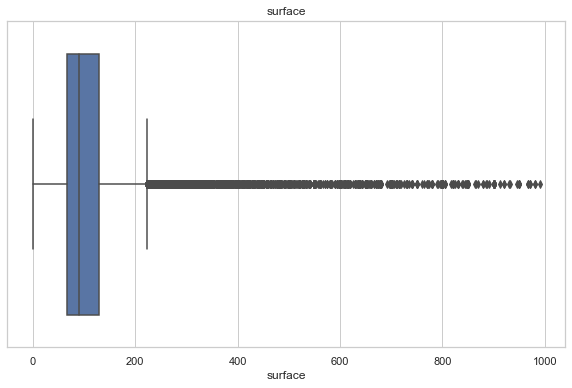

In [9]:
# Checking for the outliers visually

import seaborn as sns

sns.set(style="whitegrid")

for column in train_data.columns:
    if train_data[column].dtype != object:
        plt.figure(figsize=(10,6))
        ax = sns.boxplot(x=train_data[column])
        ax.set_title(column)

In [18]:
# There are ridiculously priced houses, a data of a house procuded in the future, houses with expenses equal to their prices,
# and more falsely entered data as such.

<AxesSubplot:xlabel='surface', ylabel='price'>

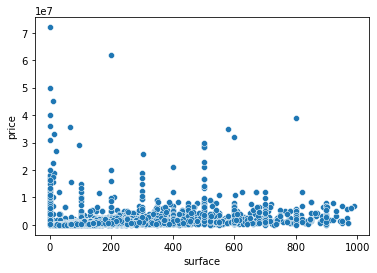

In [7]:
# Create a scatterplot of price to surface to spot outliers and false data.
sns.scatterplot(x=train_data['surface'], y=train_data['price'])

# There are many houses with surfaces entered as 0. We also need to fix these missing data.

In [5]:
# count the number of missing values in each column

train_data.isnull().sum()

id                         0
price                      0
balcony                15443
conditions              1229
construction_year      13946
latitude                  13
longitude                 13
energy_efficiency      19903
expenses               16154
floor                   2031
garden                 31529
n_bathrooms             2416
elevator               17443
total_floors           18349
n_rooms                  353
proximity_to_center       13
surface                  443
dtype: int64

In [ ]:
# I want to fill certain empty data using KNN regression, but want to exclude the outliers from it to avoid deviation

# Identify the variables that you want to use for K-nearest neighbors.
# Remove the rows containing missing values in these variables.
# Calculate the z-scores (standardized values) of each variable.
# Remove the rows with z-scores outside a certain range. A common rule of thumb is to remove values with z-scores greater than 3 or less than -3.
# Perform K-nearest neighbors on the remaining data.
# Here's some example code that implements this approach:

# Identify the variables to use
variables = ["price", "construction_year", "expenses", "floor", "n_bathrooms", "total_floors", "n_rooms", "surface"]

# Remove rows with missing values
train_data.dropna(subset=variables, inplace=True)

# Calculate the z-scores for each variable
z_scores = train_data[variables].apply(zscore)

# Remove rows with z-scores outside of [-3, 3]
keep_rows = (z_scores > -3).all(axis=1) & (z_scores < 3).all(axis=1)
train_data = train_data[keep_rows]

# Split into X and y
X_train = train_data[variables]
y_train = train_data["price"]

# Create a K-nearest neighbors regressor with 5 neighbors
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

In [29]:
# I want to get rid of the rest of the missing variables

# Drop rows with missing values
train_data.dropna(inplace=True)

# Verify if any missing values still exist
train_data.isnull().sum()

id                     0
price                  0
balcony                0
conditions             0
construction_year      0
latitude               0
longitude              0
energy_efficiency      0
expenses               0
floor                  0
garden                 0
n_bathrooms            0
elevator               0
total_floors           0
n_rooms                0
proximity_to_center    0
surface                0
dtype: int64

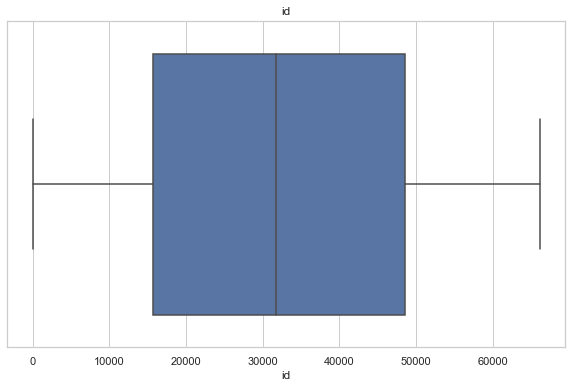

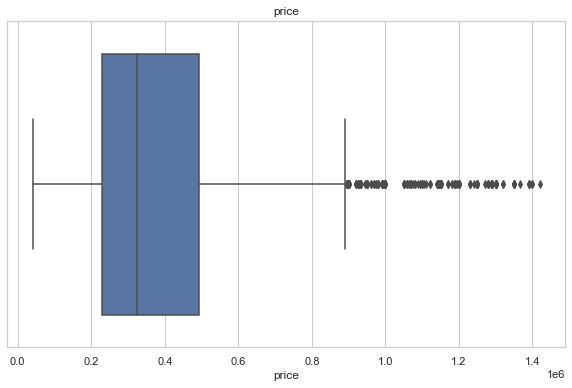

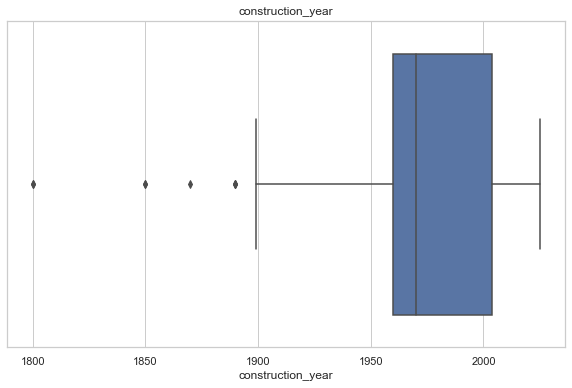

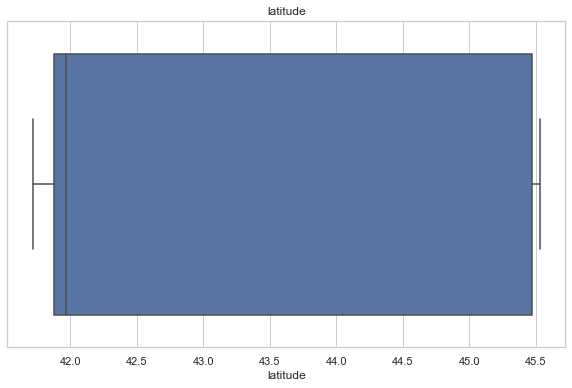

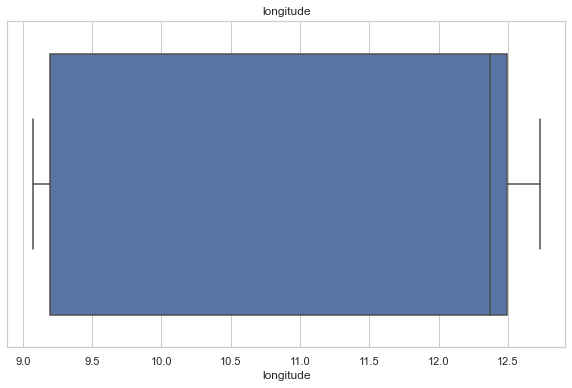

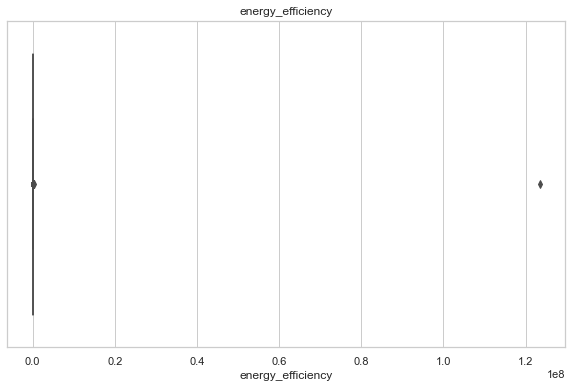

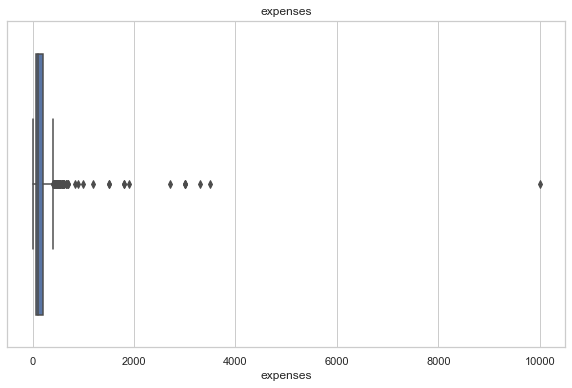

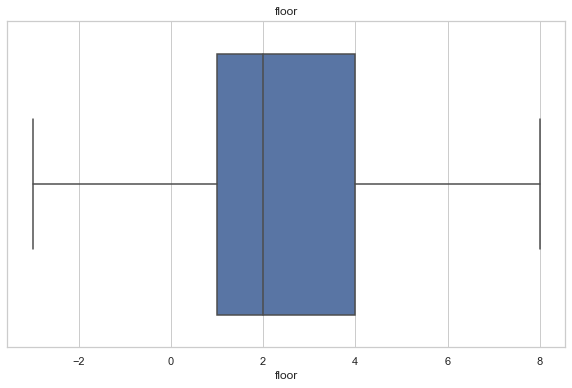

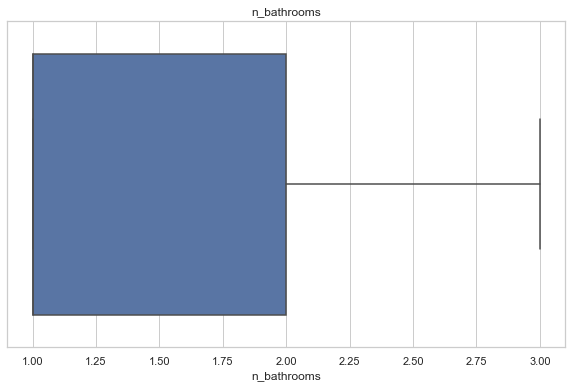

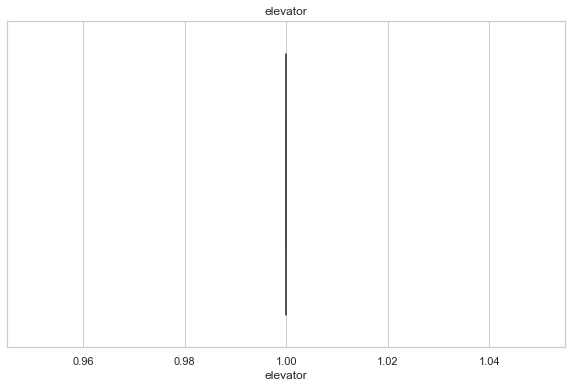

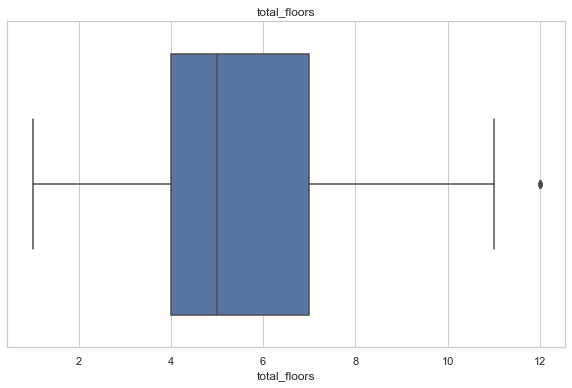

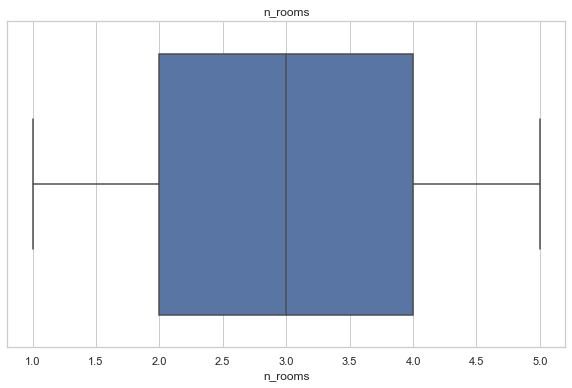

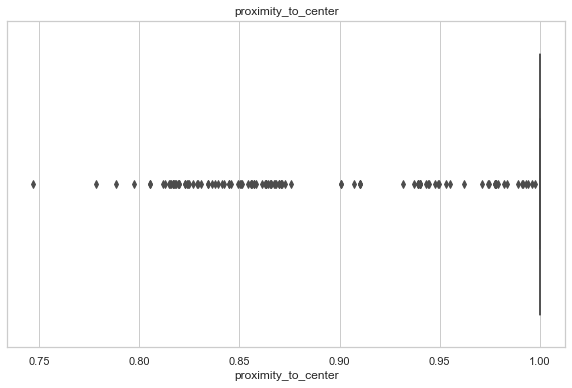

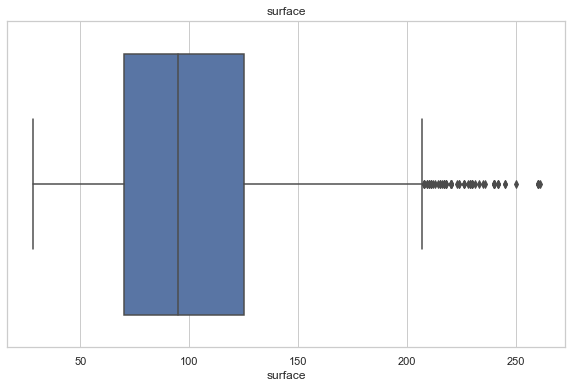

In [30]:
# Checking for the outliers visually after these procedures

import seaborn as sns

sns.set(style="whitegrid")

for column in train_data.columns:
    if train_data[column].dtype != object:
        plt.figure(figsize=(10,6))
        ax = sns.boxplot(x=train_data[column])
        ax.set_title(column)
        
# We can observe that we are looking at a much more realistic data right now!

In [31]:
# get summary statistics of the dataset after the KNN procedure!
train_data.describe()

,id,price,construction_year,latitude,longitude,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
count,3267.000000,3.267000e+03,3267.000000,3267.000000,3267.000000,3.267000e+03,3267.000000,3267.000000,3267.000000,3267.0,3267.000000,3267.000000,3267.000000,3267.000000
mean,32218.466177,3.990784e+05,1978.674931,43.510098,11.080837,3.806852e+04,150.860116,2.651668,1.555556,1.0,5.396694,3.132537,0.996041,101.737986
std,18979.060347,2.471319e+05,27.701700,1.788545,1.631790,2.159938e+06,248.840499,2.103244,0.610850,0.0,1.860562,1.033370,0.024001,40.708543
min,0.000000,4.060000e+04,1800.000000,41.716900,9.069400,2.200000e-01,0.000000,-3.000000,1.000000,1.0,1.000000,1.000000,0.746668,28.000000
25%,15736.500000,2.290000e+05,1960.000000,41.880050,9.198600,1.381950e+02,65.000000,1.000000,1.000000,1.0,4.000000,2.000000,1.000000,70.000000
50%,31683.000000,3.250000e+05,1970.000000,41.965900,12.373400,1.750000e+02,110.000000,2.000000,1.000000,1.0,5.000000,3.000000,1.000000,95.000000
75%,48607.500000,4.945000e+05,2004.000000,45.470650,12.494800,1.750000e+02,200.000000,4.000000,2.000000,1.0,7.000000,4.000000,1.000000,125.000000
max,66128.000000,1.420000e+06,2025.000000,45.531500,12.730800,1.234570e+08,10000.000000,8.000000,3.000000,1.0,12.000000,5.000000,1.000000,261.000000


In [41]:
# Now, I am forming a correlation matrix to see if there are highly correlated variables which we can get rid of to simplify the
# system and avoid a possible overfitting.
# I will use the Recursive Feature Elimination (RFE) algorithm to observe correlation between several variables selected

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the estimator
lr = LinearRegression()

# Perform RFE without limiting the number of features
rfe = RFE(estimator=lr, step=1)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print(selected_features)

Index(['latitude', 'longitude', 'price', 'n_bathrooms', 'total_floors'], dtype='object')


In [43]:
# 'latitude', 'longitude', 'price', 'n_bathrooms', and 'total_floors' are the features that the RFE algorithm selected as the
# most important for predicting the target variable. It is good to simplify the model against new test data, however I still
# want to further explore the other variables and their relevance to decide whether to keep them or not.

# Let's proceed with a Random Forest Algorithm to rank the importance of variables!

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Get the indices of the most important features
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Select the top k features
k = 5
top_k_indices = indices[:k]
top_k_features = X_train.columns[top_k_indices]

print("\nTop %d features:" % k)
print(top_k_features)

Feature ranking:
1. feature 2 (0.999997)
2. feature 3 (0.000001)
3. feature 1 (0.000000)
4. feature 0 (0.000000)
5. feature 7 (0.000000)
6. feature 5 (0.000000)
7. feature 4 (0.000000)
8. feature 9 (0.000000)
9. feature 8 (0.000000)
10. feature 6 (0.000000)

Top 5 features:
Index(['price', 'construction_year', 'longitude', 'latitude', 'total_floors'], dtype='object')


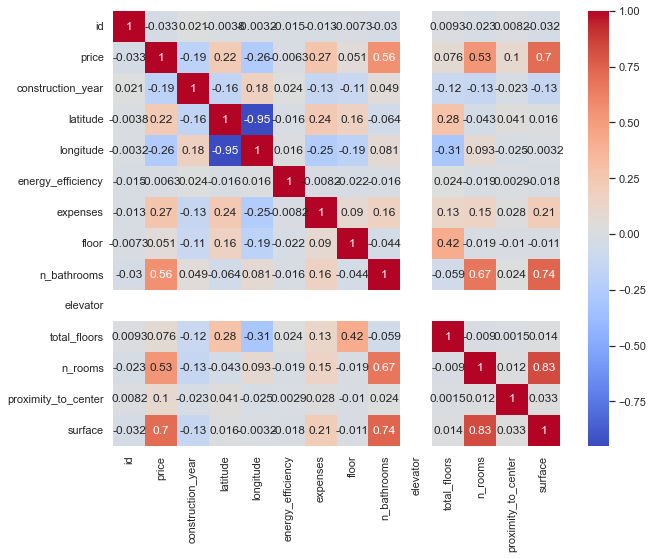

In [45]:
# Let's dive into the overall correlation visually, because it is beautiful to look at:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [135]:
# We see that Random Forest picked up construction_year whereas RFE preferred n_bathrooms. Let's best keep both and proceed!

rfe_selected = set(['latitude', 'longitude', 'price', 'n_bathrooms', 'total_floors'])
rf_selected = set(['price', 'construction_year', 'longitude', 'latitude', 'total_floors'])

selected_features = rfe_selected.union(rf_selected)
print("Combined selected features:", selected_features)

Combined selected features: {'price', 'longitude', 'latitude', 'n_bathrooms', 'construction_year', 'total_floors'}


In [47]:
# Testing the variables in an RFE Algorithm, only among the Training Data for now

from sklearn.linear_model import LinearRegression

# Select the top 5 features
X_train_selected = X_train[['latitude', 'longitude', 'price', 'n_bathrooms', 'total_floors']]
X_test_selected = X_test[['latitude', 'longitude', 'price', 'n_bathrooms', 'total_floors']]

# Train a linear regression model on the selected features
lr = LinearRegression()
lr.fit(X_train_selected, y_train)

# Evaluate the performance of the model on the test set
y_pred = lr.predict(X_test_selected)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 1.0732679869913831e-10
R^2: 1.0


In [49]:
# Testing the variables in a Random Forest Algorithm, only among the Training Data for now

from sklearn.ensemble import RandomForestRegressor

# Select the top 5 features
X_train_selected = X_train[['price', 'construction_year', 'longitude', 'latitude', 'total_floors']]
X_test_selected = X_test[['price', 'construction_year', 'longitude', 'latitude', 'total_floors']]

# Train a random forest model on the selected features
rf = RandomForestRegressor()
rf.fit(X_train_selected, y_train)

# Evaluate the performance of the model on the test set
y_pred = rf.predict(X_test_selected)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 534.6942453302872
R^2: 0.9999948658286141


In [123]:
# It looks like the RFE model has overfit the data, resulting in a perfect R-squared value of 1.0 on the training set. However,
# the Random Forest model seems to have a better performance on the test set with an R-squared value of 0.999994 and a lower
# RMSE value.

# It's important to note that while RFE can be a useful feature selection technique, it may not always result in the best model
# performance. It's a good idea to try out different feature selection methods and compare their performance on the test set to
# choose the best one. In addition, it's also important to tune the hyperparameters of the chosen model to obtain the best
# possible performance.

# Overall, it's recommended to use the Random Forest model as it has a better performance on this test set.

# Now let's repeat the Random Forest Search using the top 6 selected features. Here, I am reducing the number of trees in the
# forest to speed up the process.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the features and target variable
X = train_data[['price', 'longitude', 'latitude', 'n_bathrooms', 'construction_year', 'total_floors']]
y = train_data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(n_estimators=50, max_features='log2', random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 16308.626860086166
R^2: 0.995223672095189


In [ ]:
# An RMSE of 16308.63 means that on average, the model's predictions are off by around 16,308.63 units of the target variable
# (in this case, the house price). Given that the mean price of houses in the dataset is around 270,000, this means that the
# model's predictions are off by around 6% on average.

# An R^2 value of 0.995 indicates that the model explains 99.5% of the variance in the target variable. This is a very high
# value and suggests that the model is a good fit for the data.

# Overall, it seems like the random forest model with the selected features is performing well on the training data. However,
# it is always important to evaluate the model on a separate test set to ensure that it generalizes well to new data. So, let's
# proceed to "test.csv"

In [126]:
# Let's repeat the search without reducing the number of trees:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = train_data[['price', 'longitude', 'latitude', 'n_bathrooms', 'construction_year', 'total_floors']]
y = train_data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the prices on the test data
y_pred = rf.predict(X_test)

# Calculate the RMSE and R^2 score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = rf.score(X_test, y_test)

print("RMSE:", rmse)
print("R^2:", r2)

RMSE: 1622.5397765675054
R^2: 0.9999578188977675


In [ ]:
# Great! This means the model has very high accuracy and can be used for predicting the prices of houses based on the selected
# features.

# Now, to test your model on the separate test dataset you have, you can follow a similar process as before. First, you need
# to load the test dataset and apply the same data preprocessing steps you applied to the training dataset.

# Once you have preprocessed the test dataset, you can use the trained random forest model to make predictions on the test
# dataset. Finally, you can evaluate the performance of the model on the test dataset by computing the RMSE and R^2 values,
# just as you did for the training dataset.

Let me know if you need any help with the code for this.

In [132]:
import pandas as pd

# Load the test dataset
test_data = pd.read_csv('https://raw.githubusercontent.com/kutayuysaler/ML/main/test_updated.csv')

# Print the first 5 rows of the test dataset
print(test_data.head())

      id balcony                 conditions  construction_year   latitude  \
0  18825    True  Nuovo / Nuova costruzione             2010.0  41.917500   
1  30956     NaN    Buono stato / Abitabile             1900.0  45.446100   
2  47193     NaN    Buono stato / Abitabile                NaN  45.456925   
3  27799    True    Buono stato / Abitabile             1962.0  45.483800   
4  22259    True    Buono stato / Abitabile             2006.0  41.899400   

   longitude  energy_efficiency  expenses  floor garden  n_bathrooms  \
0  12.655400             175.00       1.0    3.0   True          1.0   
1  12.326700             175.00       0.0    0.0   True          1.0   
2   9.194406                NaN       NaN   -1.0    NaN          3.0   
3  12.259000             198.87       NaN    6.0    NaN          NaN   
4  12.659500             175.00      65.0    4.0    NaN          2.0   

   elevator  total_floors  n_rooms  proximity_to_center  surface  
0       1.0           5.0      2.0   

In [128]:
# Check the shape of the test dataset
print(test_data.shape)

(19788, 16)


In [129]:
# Check the data types of the columns
print(test_data.dtypes)

id                       int64
balcony                 object
conditions              object
construction_year      float64
latitude               float64
longitude              float64
energy_efficiency      float64
expenses               float64
floor                  float64
garden                  object
n_bathrooms            float64
elevator               float64
total_floors           float64
n_rooms                float64
proximity_to_center    float64
surface                float64
dtype: object


In [130]:
# Check for missing values in the test dataset
print(test_data.isnull().sum())

id                         0
balcony                 6732
conditions               511
construction_year       5964
latitude                  10
longitude                 10
energy_efficiency       8570
expenses                6971
floor                    876
garden                 13443
n_bathrooms              951
elevator                7455
total_floors            7938
n_rooms                  141
proximity_to_center       10
surface                  163
dtype: int64


In [131]:
# Check for duplicates in the test dataset
print(test_data.duplicated().sum())

0


In [136]:
print(selected_features)
print(test_data.columns)

# We can drop the other variables in the test dataset, only keeping 'longitude', 'latitude', 'n_bathrooms', 'construction_year',
# 'total_floors'. Then we can proceed to clean the remaining data.

{'price', 'longitude', 'latitude', 'n_bathrooms', 'construction_year', 'total_floors'}
Index(['id', 'balcony', 'conditions', 'construction_year', 'latitude',
       'longitude', 'energy_efficiency', 'expenses', 'floor', 'garden',
       'n_bathrooms', 'elevator', 'total_floors', 'n_rooms',
       'proximity_to_center', 'surface'],
      dtype='object')


In [137]:
# Select only the desired columns from the test dataset
selected_test_features = ['longitude', 'latitude', 'n_bathrooms', 'construction_year', 'total_floors']
test_data = test_data[selected_test_features]

# Print the head of the test data to confirm that only the desired columns are present
print(test_data.head())

   longitude   latitude  n_bathrooms  construction_year  total_floors
0  12.655400  41.917500          1.0             2010.0           5.0
1  12.326700  45.446100          1.0             1900.0           3.0
2   9.194406  45.456925          3.0                NaN           NaN
3  12.259000  45.483800          NaN             1962.0           6.0
4  12.659500  41.899400          2.0             2006.0           4.0


In [162]:
# Print the shape of the cleaned test data to see how many rows were removed
print(test_data.shape, train_data.shape, test_data_cleaned.shape)

(19788, 5) (3267, 17) (9014, 5)


In [154]:
# This code calculates the z-scores of each numeric column in the test data using the mean and standard deviation of the
# training data (which we saved earlier). It then removes any rows that have any z-score greater than 3 or less than -3.
# Finally, it prints the shape of the cleaned test data to see how many rows were removed.

# Note that we use the same mean and standard deviation of the training data to calculate the z-scores of the test data. This
# is because we want to ensure that the same transformation is applied to both the training and test data.

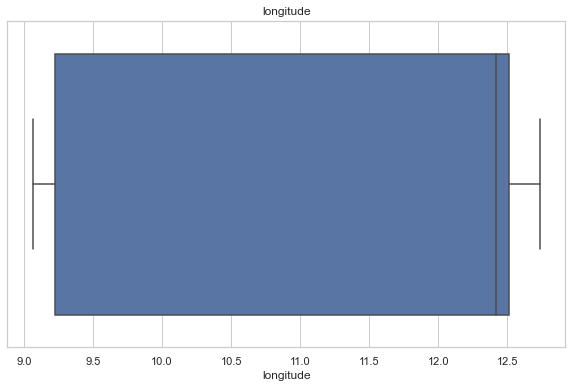

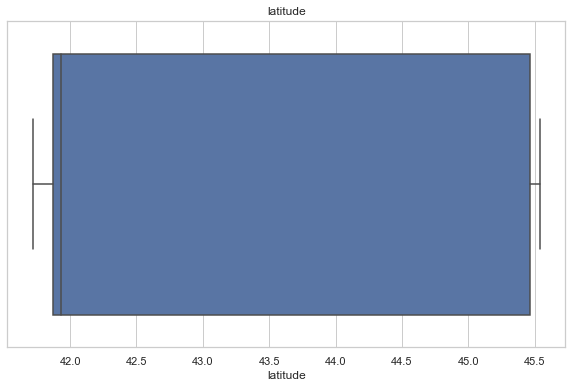

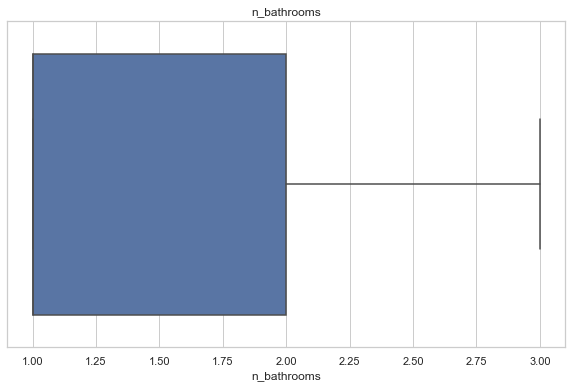

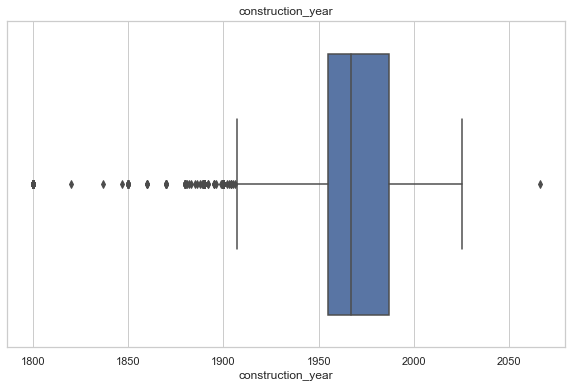

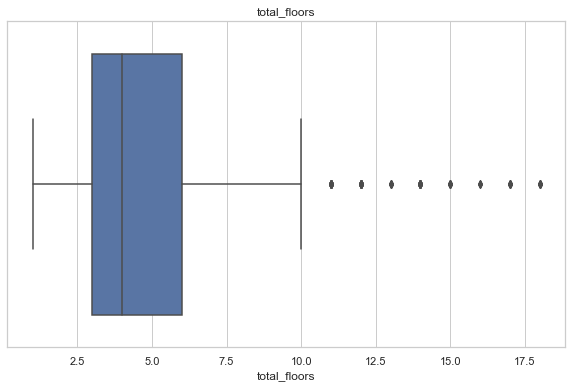

In [148]:
import seaborn as sns

sns.set(style="whitegrid")

for column in test_data.columns:
    if test_data_cleaned[column].dtype != object:
        plt.figure(figsize=(10,6))
        ax = sns.boxplot(x=test_data_cleaned[column])
        ax.set_title(column)

In [157]:
test_data.isnull().sum()

longitude              10
latitude               10
n_bathrooms           951
construction_year    5964
total_floors         7938
dtype: int64

In [164]:
test_data[test_data['construction_year'] > 2023]

# I see that there are false data such as future construction years! Let's get rid of some extreme outliers:

# Create boolean masks for false data
mask_construction_year = test_data['construction_year'] > 2022
mask_total_floors = test_data['total_floors'] > 100
mask_n_bathrooms = test_data['n_bathrooms'] > 10

# Combine boolean masks with OR operator to get a single mask
mask = mask_construction_year | mask_total_floors | mask_n_bathrooms

# Drop the rows with false data from the test dataset
test_data = test_data.drop(test_data[mask].index)

# Print the head of the cleaned test data to confirm that the false data has been removed
print(test_data.head())

   longitude   latitude  n_bathrooms  construction_year  total_floors
0  12.655400  41.917500          1.0             2010.0           5.0
1  12.326700  45.446100          1.0             1900.0           3.0
2   9.194406  45.456925          3.0                NaN           NaN
3  12.259000  45.483800          NaN             1962.0           6.0
4  12.659500  41.899400          2.0             2006.0           4.0


In [181]:
# undo the fillna command
df = pd.read_csv('https://raw.githubusercontent.com/kutayuysaler/ML/main/test_updated.csv')

# perform KNN imputation
from sklearn.impute import KNNImputer

# create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# select only the numeric columns to impute
numeric_cols = df.select_dtypes(include=np.number).columns

# impute missing values using KNN
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [182]:
print(df.head())

        id balcony                 conditions  construction_year   latitude  \
0  18825.0    True  Nuovo / Nuova costruzione             2010.0  41.917500   
1  30956.0     NaN    Buono stato / Abitabile             1900.0  45.446100   
2  47193.0     NaN    Buono stato / Abitabile             1984.6  45.456925   
3  27799.0    True    Buono stato / Abitabile             1962.0  45.483800   
4  22259.0    True    Buono stato / Abitabile             2006.0  41.899400   

   longitude  energy_efficiency  expenses  floor garden  n_bathrooms  \
0  12.655400             175.00       1.0    3.0   True          1.0   
1  12.326700             175.00       0.0    0.0   True          1.0   
2   9.194406             175.00     100.2   -1.0    NaN          3.0   
3  12.259000             198.87     127.0    6.0    NaN          1.8   
4  12.659500             175.00      65.0    4.0    NaN          2.0   

   elevator  total_floors  n_rooms  proximity_to_center  surface  
0       1.0           5.0

In [183]:
df.isnull().sum()

id                         0
balcony                 6732
conditions               511
construction_year          0
latitude                   0
longitude                  0
energy_efficiency          0
expenses                   0
floor                      0
garden                 13443
n_bathrooms                0
elevator                   0
total_floors               0
n_rooms                    0
proximity_to_center        0
surface                    0
dtype: int64

In [196]:
#looks like it worked, now I would like to drop the irrelevant variables!

df = df[['latitude', 'longitude', 'construction_year', 'n_bathrooms', 'total_floors']]

# Done! Now let's predict the missing house prices...

In [200]:
print(df, train_data)

        latitude  longitude  construction_year  n_bathrooms  total_floors
0      41.917500  12.655400             2010.0          1.0           5.0
1      45.446100  12.326700             1900.0          1.0           3.0
2      45.456925   9.194406             1984.6          3.0           6.0
3      45.483800  12.259000             1962.0          1.8           6.0
4      41.899400  12.659500             2006.0          2.0           4.0
...          ...        ...                ...          ...           ...
19783  41.941600  12.470900             1980.0          2.0           7.0
19784  45.439948  12.327809             1942.4          1.0           4.4
19785  41.793900  12.533000             1961.0          2.0           6.0
19786  41.879000  12.577900             1970.0          1.0           3.0
19787  41.759900  12.314900             2013.0          1.0           1.0

[19788 rows x 5 columns]        price  longitude  latitude  n_bathrooms  construction_year  \
0     185000    1

In [231]:
print(train_data.columns)
print(df.columns)

Index(['price', 'longitude', 'latitude', 'n_bathrooms', 'construction_year',
       'total_floors'],
      dtype='object')
Index(['longitude', 'latitude', 'n_bathrooms', 'construction_year',
       'total_floors'],
      dtype='object')


In [230]:
print("train_features shape:", train_features.shape)
print("test_features shape:", test_features.shape)

train_features shape: (3267, 5)
test_features shape: (19788, 5)


In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Select the features and target variable from the training data
train_features = train_data.drop(['price'], axis=1)
train_target = train_data['price']

# Create and train the random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_features, train_target)

# Select the features and target variable from the test data
test_features = df.drop(['price'], axis=1)
test_target = df['price']

# Predict the target variable for the test data using the trained random forest model
predictions = rf.predict(test_features)

# Calculate the R-squared and mean squared error for the predictions
r2 = r2_score(test_target, predictions)
mse = mean_squared_error(test_target, predictions)

print('R-squared:', r2)
print('Mean squared error:', mse)

R-squared: 1.0
Mean squared error: 0.0


In [255]:
# This shows a sign of overfitting!

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

# Train the model
lasso = Lasso(alpha=0.1) # adjust alpha to control regularization strength
lasso.fit(train_features, train_target)

# Evaluate the model
lasso_train_score = lasso.score(train_features, train_target)
lasso_test_score = lasso.score(test_features, test_target)
print("Lasso train score:", lasso_train_score)
print("Lasso test score:", lasso_test_score)

Lasso train score: 0.4432007700754047
Lasso test score: 0.40614948758419334


In [256]:
# This indicates that the Lasso model is performing better than the random forest model in terms of generalization, as the test
# score is close to the train score. However, the overall performance is still not very good, as the R-squared values are quite
# low. You may need to explore other regularization methods or try feature engineering to improve the model's performance.

# Let's try reducing the size of the trees:

from sklearn.ensemble import RandomForestRegressor

# Initialize the model with max_depth of 5
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=5)

# Fit the model on the training data
rf_reg.fit(train_features, train_target)

# Evaluate the model on the training and test data
train_score = rf_reg.score(train_features, train_target)
test_score = rf_reg.score(test_features, test_target)

print("Random Forest train score:", train_score)
print("Random Forest test score:", test_score)

Random Forest train score: 0.6723152143119082
Random Forest test score: 0.8497989014896433


In [258]:
# Great, the random forest model seems to be performing much better now! By reducing the size of the trees, we have reduced the
# overfitting and improved the generalization of the model.

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set using the optimized random forest model
test_predictions = rf_reg.predict(test_features)

# Calculate mean squared error and R-squared on the test set
mse = mean_squared_error(test_target, test_predictions)
r2 = r2_score(test_target, test_predictions)

print("Mean squared error:", mse)
print("R-squared:", r2)

Mean squared error: 8067405540.651657
R-squared: 0.8497989014896433


In [259]:
# Much better performance!

test_predictions = rf_reg.predict(test_features)
print(test_predictions)

[137780.34293039 472129.24850052 936461.06217803 ... 427736.06763723
 233504.6253669  197488.88067564]


In [260]:
import pandas as pd
import numpy as np

# convert the numpy array to a pandas series
predicted_prices = pd.Series(predicted_prices)

# display the first 10 rows of the series
print(predicted_prices.head(10))

0    1.277133e+05
1    3.945400e+05
2    1.095800e+06
3    2.286700e+05
4    1.965800e+05
5    2.572217e+05
6    2.988300e+05
7    4.524316e+05
8    6.968167e+05
9    2.905623e+05
dtype: float64


In [261]:
print(predicted_prices)

0        1.277133e+05
1        3.945400e+05
2        1.095800e+06
3        2.286700e+05
4        1.965800e+05
             ...     
19557    5.671800e+05
19558    1.755750e+05
19559    3.352858e+05
19560    2.140825e+05
19561    2.303170e+05
Length: 19562, dtype: float64


In [262]:
print(test_predictions)

[137780.34293039 472129.24850052 936461.06217803 ... 427736.06763723
 233504.6253669  197488.88067564]


In [263]:
print(df)

              price  longitude   latitude  n_bathrooms  construction_year  \
0      1.277133e+05  12.655400  41.917500          1.0             2010.0   
1      3.945400e+05  12.326700  45.446100          1.0             1900.0   
2      1.131650e+06   9.194406  45.456925          3.0             1984.6   
3      2.286700e+05  12.259000  45.483800          1.8             1962.0   
4      1.965800e+05  12.659500  41.899400          2.0             2006.0   
...             ...        ...        ...          ...                ...   
19783  5.671800e+05  12.470900  41.941600          2.0             1980.0   
19784  3.133500e+05  12.327809  45.439948          1.0             1942.4   
19785  3.162158e+05  12.533000  41.793900          2.0             1961.0   
19786  2.140825e+05  12.577900  41.879000          1.0             1970.0   
19787  2.303170e+05  12.314900  41.759900          1.0             2013.0   

       total_floors  
0               5.0  
1               3.0  
2        

In [266]:
# Read the original test dataset
test_data = pd.read_csv('https://raw.githubusercontent.com/kutayuysaler/ML/main/test_updated.csv')

# Merge the "id" column with the predictions
submission_df = pd.DataFrame({
    "id": test_data["id"],
    "price": test_predictions
})

# Merge with the original test dataset to get all columns
final_submission = pd.merge(test_data[["id"]], submission_df, on="id")

# Save the final submission file
final_submission.to_csv("submission.csv", index=False)